## Data imports & data cleaning
Import your data and do any necessary data merging and/or necessary cleaning (e.g. things like column renaming, irrelevant row dropping, missing data handling, data type conversions, converting categorical columns to one-hot vectors, etc. as needed).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [4]:
pd.set_option('display.max_columns', None)  # No limit on the number of displayed columns
pd.set_option('display.max_colwidth', None)

df = pd.read_excel('data.xls')
df.columns = df.iloc[0]
df = df.drop(0)
df  # display the table

# print(df.columns)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Note the following from the data:

LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

SEX: Gender (1 = male; 2 = female).

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

AGE: Age (year).

PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY0 = the repayment status in September, 2005; PAY1 = the repayment status in August, 2005; . . .; PAY6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1 - BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.

PAY_AMT1- PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

In [5]:
# 1: code for data cleanup.
#Handing missing data
df.dropna(axis=0, inplace=True)

#Type conversion
# make X1, X2, Y all numbers
df['LIMIT_BAL'] = pd.to_numeric(df['LIMIT_BAL'], errors='coerce')
df['SEX'] = pd.to_numeric(df['SEX'], errors='coerce')
df['default payment next month'] = pd.to_numeric(df['default payment next month'], errors='coerce')

# make X3 any number that isnt 1,2,3,4 to the 'other' category, which is 4
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: x if x in [1, 2, 3, 4] else 4)

# make X4 any number that isnt 1,2,3 to the 'other' category, which is 3
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: x if x in [1, 2, 3] else 3)

# make X5 all numbers
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

#One-hot enconding
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'])
df.rename(columns={'SEX_1': 'Male', 'SEX_2': 'Female',
                            'EDUCATION_1': 'Graduate_school', 'EDUCATION_2': 'University',
                            'EDUCATION_3': 'High_school', 'EDUCATION_4': 'Other_edu',
                            'MARRIAGE_1': 'Married', 'MARRIAGE_2': 'Single',
                            'MARRIAGE_3': 'Other_Maritial'}, inplace=True)


df = df[['LIMIT_BAL', 'Male', 'Female', 'Graduate_school', 'University', 'High_school', 'Other_edu', 'Married', 'Single', 'Other_Maritial', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']]

df



,LIMIT_BAL,Male,Female,Graduate_school,University,High_school,Other_edu,Married,Single,Other_Maritial,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,0,1,0,1,0,0,1,0,0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,0,1,0,1,0,0,0,1,0,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,1,0,1,0,0,0,1,0,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,1,0,1,0,0,1,0,0,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,0,0,1,0,0,1,0,0,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,0,0,0,1,0,1,0,0,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,0,0,0,1,0,0,1,0,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,0,0,1,0,0,0,1,0,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,0,0,0,1,0,1,0,0,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Summary statistics

c. Plot at least as many figures as your # group members, and explain concisely but meaningfully what the plot shows in markdown text

i. Examples: histograms or density plots showing the distributions of relevant outcome variables, broken down by different sensitive attribute subgroups. Scatterplots showing the relationships between different variables to be used in your analysis. All plots should be easy to read (well-labeled, formatted well, etc.).

Overall the dataset has 30,000 rows and 30 columns. There are 3 sensitive attributes in this dataset: sex, education, marital status. Each of these attributes are 30,000 rows. Sex has 2 columns: male and female. Education has 4 columns: 'Graduate_school', 'University', 'High_school', and 'Other_edu'. Maritial Status has 3 columns: 'Married', 'Single' and 'Other_Maritial'.

In [6]:
print("In this dataset, our outcome variable of interest is default payment next month.")

#overall mean/median/standard deviation values
mean = df['default payment next month'].mean()
median = df['default payment next month'].median()
std = df['default payment next month'].std()

print(f"The overall mean is {mean}.")
print(f"The overall median is {median}.")
print(f"The overall standard deviation is {std}.")

#sex mean/median/standard deviation values
sexs = ['Male', 'Female']
for sex in sexs:
    sex_outcome = df[df[sex] == True]['default payment next month']
    sex_mean = sex_outcome.mean()
    sex_median = sex_outcome.median()
    sex_std = sex_outcome.std()

    print(f"The mean for {sex} is {sex_mean}.")
    print(f"The median for {sex} is {sex_median}.")
    print(f"The standard deviation for {sex} is {sex_std}.")


#education mean/median/standard deviation values
education_levels = ['Graduate_school', 'University', 'High_school', 'Other_edu']
for edu_level in education_levels:
    edu_outcome = df[df[edu_level] == True]['default payment next month']
    edu_mean = edu_outcome.mean()
    edu_median = edu_outcome.median()
    edu_std = edu_outcome.std()

    print(f"The mean for {edu_level} is {edu_mean}.")
    print(f"The median for {edu_level} is {edu_median}.")
    print(f"The standard deviation for {edu_level} is {edu_std}.")


#maritial status mean/median/standard deviation values
marital_status = ['Married', 'Single', 'Other_Maritial']
for status in marital_status:
    status_outcome = df[df[status] == True]['default payment next month']
    status_mean = status_outcome.mean()
    status_median = status_outcome.median()
    status_std = status_outcome.std()

    print(f"The mean for {status} is {status_mean}.")
    print(f"The median for {status} is {status_median}.")
    print(f"The standard deviation for {status} is {status_std}.")




In this dataset, our outcome variable of interest is default payment next month.
The overall mean is 0.2212.
The overall median is 0.0.
The overall standard deviation is 0.41506180569093337.
The mean for Male is 0.2416722745625841.
The median for Male is 0.0.
The standard deviation for Male is 0.42811470855736516.
The mean for Female is 0.20776280918727916.
The median for Female is 0.0.
The standard deviation for Female is 0.40571728156807374.
The mean for Graduate_school is 0.19234766178554558.
The median for Graduate_school is 0.0.
The standard deviation for Graduate_school is 0.39416331210605426.
The mean for University is 0.23734853884533144.
The median for University is 0.0.
The standard deviation for University is 0.42547281089676214.
The mean for High_school is 0.2515761643278422.
The median for High_school is 0.0.
The standard deviation for High_school is 0.4339630150589658.
The mean for Other_edu is 0.07051282051282051.
The median for Other_edu is 0.0.
The standard deviation f

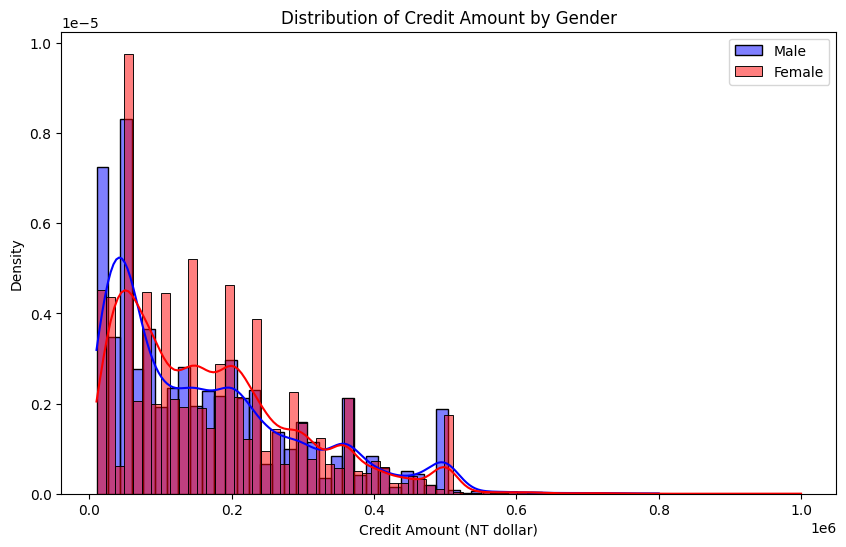

In [7]:
# 2: Code for plots

# Plot 1: Distribution of credit amount by gender
plt.figure(figsize=(10, 6))

sns.histplot(data=df[df['Male'] == 1], x="LIMIT_BAL", color='blue', kde=True, stat="density", common_norm=False, label='Male')
sns.histplot(data=df[df['Female'] == 1], x="LIMIT_BAL", color='red', kde=True, stat="density", common_norm=False, label='Female')

plt.title('Distribution of Credit Amount by Gender')
plt.xlabel('Credit Amount (NT dollar)')
plt.ylabel('Density')
plt.legend()
plt.show()


# how to interpret: bars represent the number of the data points in each category. kde lines represent approximation of data distribution.
# blue bars/ red bars: the blue corresponds to male and red corresponds to female. purple means both genders
# x axis: credit amount, 1e6. this is normal credit scores for NT dollars.
# y axis: density of credit amount, which represents higher frequency of data points for this x-axis amount.


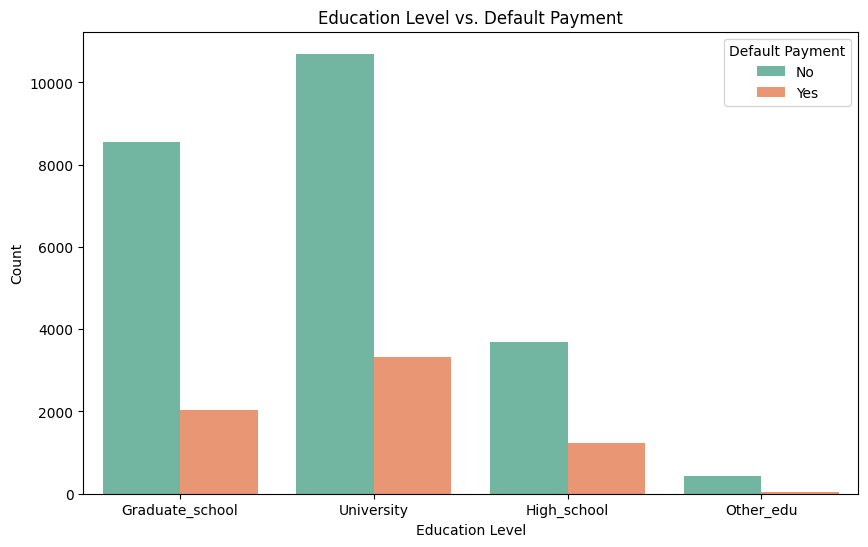

In [8]:
# Plot 2: Education Level vs. Default Payment
palette = sns.color_palette("Set2", n_colors=2) # color palette
order = ['Graduate_school', 'University', 'High_school', 'Other_edu'] #labels

plt.figure(figsize=(10, 6))
col_values = df[['Graduate_school', 'University', 'High_school', 'Other_edu']].values.argmax(axis=1)

x_value = [order[i] for i in col_values]
ax = sns.countplot(x=x_value, hue=df['default payment next month'], palette=palette, order=order)

# Legend
hue_order = [0, 1]
labels = ['No', 'Yes']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Default Payment')
plt.title('Education Level vs. Default Payment')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

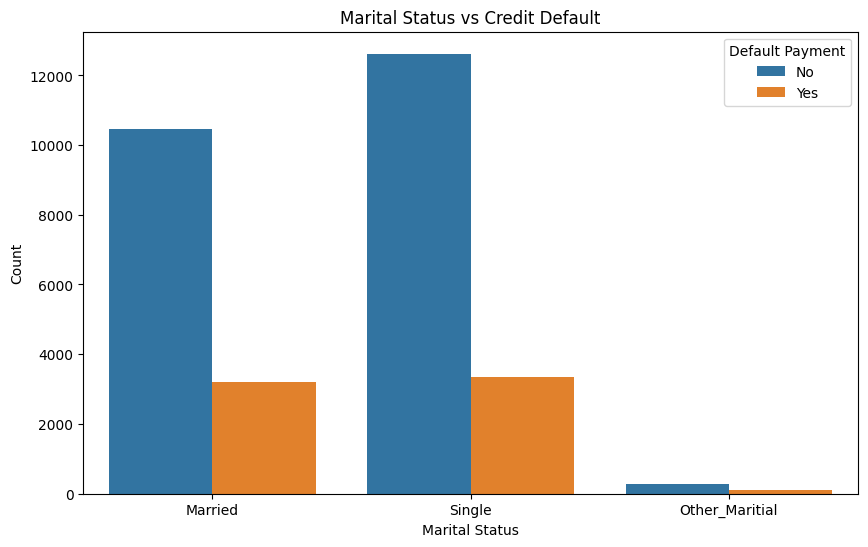

In [9]:
# Plot 3: Marital Status and Credit Default
order = ['Married', 'Single', 'Other_Maritial'] #labels

plt.figure(figsize=(10, 6))
col_values = df[['Married', 'Single', 'Other_Maritial']].values.argmax(axis=1)

x_value = [order[i] for i in col_values]
ax = sns.countplot(x=x_value, hue=df['default payment next month'], order=order)

# Legend
hue_order = [0, 1]
labels = ['No', 'Yes']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Default Payment')
plt.title('Marital Status vs Credit Default')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

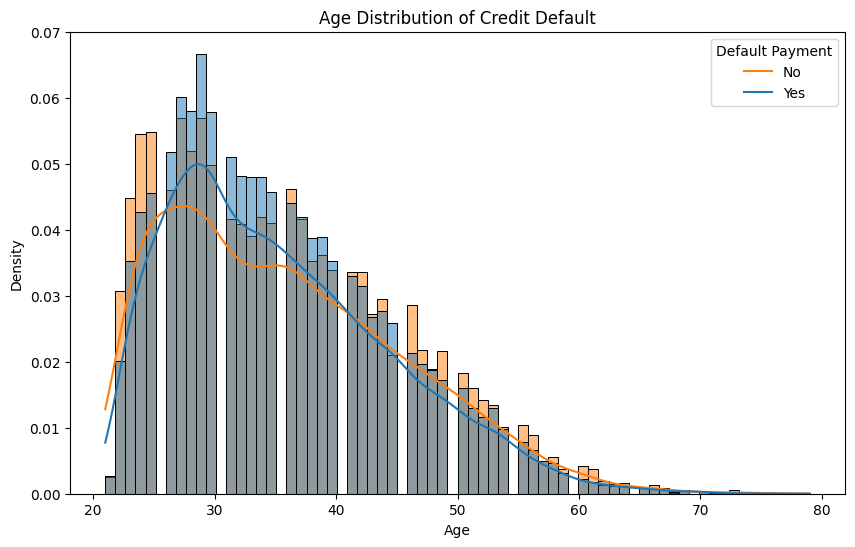

In [10]:
# Plot 4: Age Distribution of Credit Default
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="AGE", hue="default payment next month", kde=True, element="bars", stat="density", common_norm=False)
plt.title('Age Distribution of Credit Default')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Default Payment', labels=['No', 'Yes'])
plt.show()

## Research Question, Hypotheses, and Analysis Plan
a. Concretely, what is (are) your research question(s)? Be specific: what are the inputs, outputs, and evaluation metrics you are interested in, and why?

We are studying whether a fair algorithm can be trained on this data to predict credit default, without bias on sex, education, or marital status. The specific questions we will be looking at are: Are women, those with less education, or the unmarried more likely to default on credit (statistical parity)? Can models predict credit default equally well across sexes, education levels, and marital statuses (predictive equality)? We are inputting this dataset, which is sourced from October 2005 payment data from a Taiwanese bank. The input features are limit balance, sex, education level, marriage status, age, history of past payments, bill amount, and past payment amounts. The output of our model is a prediction of whether someone will default on their loan, and by extension may be used for a judgement of whether someone is worthy of credit.

b. What are your hypotheses?

We hypothesize that there will be a correlation between higher education levels and less credit default, because those who can afford the most education likely come from a wealthier background where they are able to pay for their credit.

  i. E.g., do you notice any potential biases from your summary statistics? What are they, and why might these exist?
  
c. What analyses are you going to run (in section 4) to test your hypotheses presented above?

I am usine FPR and FNR below for male and females - tasmin lmk if we want to change it  so predicitve equality

## Modeling

In [11]:
#Logistic regression with [a subset of variables]
selected_features_1 = ['LIMIT_BAL', 'Male', 'Female', 'Graduate_school', 'University', 'High_school', 'Other_edu', 'Married', 'Single', 'Other_Maritial', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1', 'PAY_AMT2', 'default payment next month']

subset_df_1 = df[selected_features_1]
y_1 = subset_df_1['default payment next month']
x_1 = subset_df_1.drop(columns=['default payment next month'])
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.2)

model_1 = LogisticRegression(penalty='none', max_iter=1000)
model_1.fit(x_train_1, y_train_1)
y_pred_1 = model_1.predict(x_test_1)
y_prob_1 = model_1.predict_proba(x_test_1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [12]:
print(df['default payment next month'].value_counts())

# Check the distribution of other categorical variables
print(df['Male'].value_counts())
print(df['Female'].value_counts())

0    23364
1     6636
Name: default payment next month, dtype: int64
0    18112
1    11888
Name: Male, dtype: int64
1    18112
0    11888
Name: Female, dtype: int64


In [13]:
#logistic regression with [upsampling methods for minority groups in the training data] - fill in the []

In [14]:
#one random forest with [a different subset of variables] - fill in the []

In [15]:
#4th analyses???

In [16]:
# 4: Code for analyses

# analysis 1: Statistical Parity

# Calculate default rates by gender, education level, and marital status

default_rate_gender = df.groupby('X2')['Y'].mean()
default_rate_education = df.groupby('X3')['Y'].mean()
default_rate_marital = df.groupby('X4')['Y'].mean()

print(default_rate_gender, default_rate_education, default_rate_marital)

KeyError: 'X2'

In [ ]:
# analysis 4: data diversity audit?
#i don't this applies to us - tasmin

gender_distribution = df['X2'].value_counts(normalize=True)
education_distribution = df['X3'].value_counts(normalize=True)
marital_status_distribution = df['X4'].value_counts(normalize=True)

print("Gender Distribution:\n", gender_distribution)
print("\nEducation Distribution:\n", education_distribution)
print("\nMarital Status Distribution:\n", marital_status_distribution)


## Results

a. Interpret the results of each model.

i. Do your model estimates seem reasonable? (e.g., provide examples of some model predictions like “for a 30 year old female patient, our model
predicts x% risk, whereas for a 30 year old male patient, our model predicts y% risk”)

ii. What can you say about your model performance (e.g., based on the evaluation metrics you calculated)?

iii. Do you have hypotheses for why your model performed well or not well?

b. Compare the performance of your models from part 4 on the evaluation metrics you noted in section 3a.

i. What do you conclude?


In [ ]:
# 5: Results for model 1
#Model predictions 1
ex_1_f = [[50000, False, True, True, False, False, False, True, False, False, 30, 1, 2, 20000, 25000, 3000, 4000]]
ex_1_f_pred = model_1.predict(ex_1_f)
ex_1_f_prob = model_1.predict_proba(ex_1_f)

ex_1_m = [[50000, True, True, True, False, False, False, True, False, False, 30, 1, 2, 20000, 25000, 3000, 4000]]
ex_1_m_pred = model_1.predict(ex_1_m)
ex_1_m_prob = model_1.predict_proba(ex_1_m)

print("Prediction for 30-year-old female:", ex_1_f_pred, "with probability:", ex_1_f_prob[0][ex_1_f_pred])
print("Prediction for 30-year-old male:", ex_1_m_pred, "with probability:", ex_1_m_prob[0][ex_1_m_pred])


#Model prediction 2
ex_2_f = [[50000, False, True, True, False, False, False, False, True, False, 30, 1, 2, 20000, 25000, 3000, 4000]]
ex_2_f_pred = model_1.predict(ex_2_f)
ex_2_f_prob = model_1.predict_proba(ex_2_f)

ex_2_m = [[50000, True, True, True, False, False, False, False, True, False, 30, 1, 2, 20000, 25000, 3000, 4000]]
ex_2_m_pred = model_1.predict(ex_2_m)
ex_2_m_prob = model_1.predict_proba(ex_2_m)

print("Prediction for 30-year-old single female:", ex_2_f_pred, "with probability:", ex_2_f_prob[0][ex_2_f_pred])
print("Prediction for 30-year-old single male:", ex_2_m_pred, "with probability:", ex_2_m_prob[0][ex_2_m_pred])

#Model prediction 3
ex_3_f = [[50000, False, True, False, False, False, True, True, False, False, 30, 1, 2, 20000, 25000, 3000, 4000]]
ex_3_f_pred = model_1.predict(ex_3_f)
ex_3_f_prob = model_1.predict_proba(ex_3_f)

ex_3_m = [[50000, True, False, False, False, False, True, True, False, False, 30, 1, 2, 20000, 25000, 3000, 4000]]
ex_3_m_pred = model_1.predict(ex_3_m)
ex_3_m_prob = model_1.predict_proba(ex_3_m)

print("Prediction for 30-year-old other education married female:", ex_3_f_pred, "with probability:", ex_3_f_prob[0][ex_3_f_pred])
print("Prediction for 30-year-old other education married male:", ex_3_m_pred, "with probability:", ex_3_m_prob[0][ex_3_m_pred])

Based on the calculations above, the model predicts 0 for all of the scenarios with a probability around 67.4%. This is regardless of the gender, maritial status, or education of the person that model is predicting for. This uniformity across the predictions highlights that the model is not accurate and does not capture the complexities of credit default. As a result, the model does not seem reasonable. Moreover, with a prediction rate only slightly higher than chance at 67%, the model is a bit better than randomly guessing.

In [ ]:
# 5: Results for model 1

#overall
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(y_test_1, y_pred_1).ravel()
fnr_1 = fn_1/(tp_1 + fn_1)
fpr_1 = fp_1/(fp_1 + tn_1)
print("The model's false negative rate for all is", fnr_1)
print("The model's false positive rate for all is", fpr_1)


#male
m_y_pred_1= y_pred_1[x_test_1['Male'] == 1]
m_y_test_1 = y_test_1[x_test_1['Male'] == 1]
m_tn_1, m_fp_1, m_fn_1, m_tp_1 = confusion_matrix(m_y_test_1, m_y_pred_1).ravel()
m_fnr_1 = m_fn_1 / (m_tp_1 + m_fn_1)
m_fpr_1 = m_fp_1 / (m_fp_1 + m_tn_1)
print("The model's false negative rate for males is", m_fnr_1)
print("The model's false positive rate for males is", m_fpr_1)

#female
f_y_pred_1 = y_pred_1[x_test_1['Female'] == 1]
f_y_test_1 = y_test_1[x_test_1['Female'] == 1]
f_tn_1, f_fp_1, f_fn_1, f_tp_1 = confusion_matrix(f_y_test_1, f_y_pred_1).ravel()
f_fnr_1 = f_fn_1 / (f_tp_1 + f_fn_1)
f_fpr_1 = f_fp_1 / (f_fp_1 + f_tn_1)
print("The model's false negative rate for females is", f_fnr_1)
print("The model's false positive rate for females is", f_fpr_1)


Based on the metrics calculated above, we can interpret that the model is fair as it meets the definition of predictive equality. The overall false negative rate is approximately 1.0. The model's false negative rate for males and females is approximately 1.0 as well. The overall false positive rate is approximately 0.0. The model's false positive rate for males and females is approximately 0.0 as well. By defintion of predictive equality, the false negative rate for males should equal the false negative rate for females and the false positive rate for males should equal the false positive rate for females. Since this is met, the model meets the criteria for fairness per predicitve equality.

In [ ]:
print(df['default payment next month'].value_counts())

Model 1 is a logistic regression with a subset of variables as features. This model did not perform well as it predicted 0 for all inputted features. We have some assumptions as to why it did not perform well. One is that the target variable, default payment next month, is not balanced as Class 0 has 4 times as many instanes than Class 1. This might have caused the model to predict the majority class(0) more than the minority class. Another reason could be that logistic regression is not the best model for this dataset. Thus, another model such as decision trees or random forests would work better.

## Contribution Notes
For each team member’s name, specify what their contributions were to this Phase 2 submission.

## Sources cited
a. Must include a citation of the data source(s) in ACM format.
b. Must include links to any sources used to assist with coding (do not need to be in ACM format). Remember, any use of generative AI tools such as ChatGPT must be cited including the query used, the answer output, and why you think the answer is correct.

Dataset:
I-Cheng Yeh. 2016. Default of credit card clients. UCI Machine Learning Repository. Retrieved from https://doi.org/10.24432/C55S3H

Code Sources:

https://stackoverflow.com/questions/26147180/convert-row-to-column-header-for-pandas-dataframe

https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

https://seaborn.pydata.org/generated/seaborn.countplot.html